# South African Language Identification
**EDSA 2021 Classification Hackathon**

Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government (https://www.gov.za/about-sa/south-africas-people).

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

Import Libraries

In [1]:
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB


# Accuracy Scores
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Data Cleaning
import emoji
from bs4 import BeautifulSoup
import re
import itertools
import string

Load the data

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
train_data = train.copy()

In [4]:
train_data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## Preprocessing

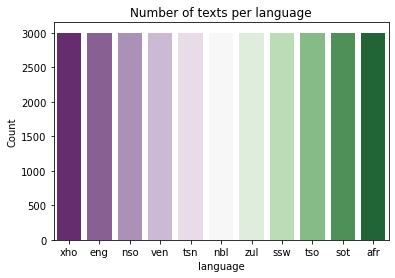

In [5]:
sns.countplot(x='lang_id' ,data = train_data, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('language')
plt.title('Number of texts per language')

plt.show()

In [6]:
language_list = list(train_data.lang_id.unique())
print(language_list)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def word_lemma(words, lemmatizer):
    
    lemma = [lemmatizer.lemmatize(word) for word in words]
    return ''.join([l for l in lemma])

In [8]:
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

In [9]:
def cleaning(text):    
    
    #Lower case
    text = text .lower()
    #Removal of Punctuation
    text = remove_punctuation_numbers(text)
    text = word_lemma(text, lemmatizer)
    return text

In [10]:
train_data['processed_text'] = train_data['text'].apply(cleaning)

In [11]:
train_data.head()

,lang_id,text,processed_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [12]:
#cleaning the data

def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

## Training

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data['processed_text'], train_data["lang_id"], test_size = 0.2, random_state = 42)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer()
vectorizer = TfidfVectorizer(ngram_range = (5,5), analyzer = 'char')

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', vectorizer), 
                 ('NB', MultinomialNB(alpha=1.0))])

In [17]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(5, 5))),
                ('NB', MultinomialNB())])

In [18]:
y_pred = pipe.predict(x_test)

In [19]:
f1 = f1_score(y_test, y_pred, average= 'weighted')

In [20]:
f1

0.9995454573156426

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred, target_names= language_list))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nso       1.00      1.00      1.00       583
         ven       1.00      1.00      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       1.00      1.00      1.00       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       1.00      1.00      1.00       609
         afr       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



## Predictions

In [28]:
test['processed_text'] = test['text'].apply(cleaning)

In [29]:
test.head()

,index,text,processed_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


In [30]:
drop_features(['text'],test)

In [31]:
predictions = pipe.predict(test['processed_text'])

In [32]:
final_result = pd.DataFrame({'index':test['index'],'lang_id':predictions})
final_result.to_csv('Output5.csv',index=False)

In [33]:
final_result.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
